<a href="https://colab.research.google.com/github/PrajwalRaj21/python/blob/main/HandTalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy opencv-python-headless tensorflow matplotlib pillow


In [ ]:
!wget -q https://noto-website-2.storage.googleapis.com/pkgs/NotoSansDevanagari-hinted.zip
!unzip -q NotoSansDevanagari-hinted.zip -d /usr/share/fonts/


Saving क.jpg to क (7).jpg
Epoch 1/10
13/13 [==============================] - 13s 648ms/step - loss: 0.0579 - accuracy: 0.9900
Epoch 2/10
13/13 [==============================] - 7s 563ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 9s 691ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 7s 556ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 9s 690ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 7s 567ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 9s 648ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 9s 748ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 8s 580ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 536ms/step
Predicti

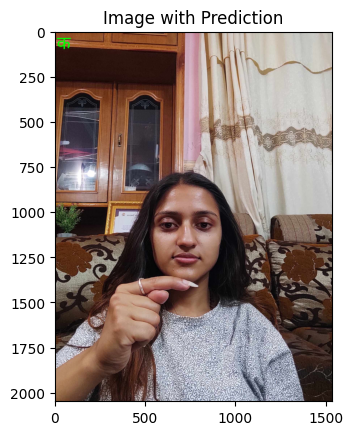

In [10]:
# Upload your image
from google.colab import files
uploaded = files.upload()

import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    return image

# Dummy image to simulate the sign 'क'
dummy_image = np.random.randint(0, 256, (64, 64, 3), dtype=np.uint8)
dummy_image = preprocess_image(dummy_image)

# Create dummy data by augmenting the image
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
dummy_data = []
dummy_labels = []

for _ in range(100):  # Create 100 samples
    augmented_image = datagen.random_transform(dummy_image)
    sequence = np.array([augmented_image for _ in range(10)])  # Create a sequence of 10 frames
    dummy_data.append(sequence)
    dummy_labels.append(1)  # Label for 'क'

dummy_data = np.array(dummy_data) / 255.0
dummy_labels = np.array(dummy_labels)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), input_shape=(10, 64, 64, 3)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2))),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(dummy_data, dummy_labels, epochs=10, batch_size=8)

# Save the model
model.save('sign_language_model.h5')

# Load the trained model
model = tf.keras.models.load_model('sign_language_model.h5')

# Preprocess the image to create a sequence
test_sequence = np.array([preprocess_image(image) for _ in range(10)])  # Create a sequence of 10 frames
test_sequence = np.expand_dims(test_sequence, axis=0) / 255.0  # Add batch dimension and normalize

# Predict
prediction = model.predict(test_sequence)

# Display the prediction
label = 'क' if prediction[0][0] > 0.5 else 'Not क'
print(f"Prediction: {label}")

# Convert the image to RGB (PIL uses RGB format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(image_rgb)

# Prepare the draw object and font
draw = ImageDraw.Draw(image_pil)
font_path = "/usr/share/fonts/NotoSansDevanagari-Regular.ttf"
font = ImageFont.truetype(font_path, 100)
text_color = (0,0,0)

# Calculate text size for centering
text_bbox = draw.textbbox((0, 0), label, font=font)
text_position = ((image_pil.width - text_bbox[2]) // 2, (image_pil.height - text_bbox[3]) // 2)



# Draw the text
draw.text((10, 10), label, font=font, fill=(0, 255, 0))

# Convert back to OpenCV format
image_with_text = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

# Display the image with the prediction
plt.imshow(cv2.cvtColor(image_with_text, cv2.COLOR_BGR2RGB))
plt.title('Image with Prediction')
plt.show()